In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd drive/MyDrive/'...Your path...'/

In [ ]:
pip install linearmodels

In [ ]:
pip install shap

In [ ]:
# used packages
import pandas as pd
import numpy as np
import statistics
from linearmodels import PanelOLS, RandomEffects
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy.linalg as la
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.models import load_model
import tensorflow
tensorflow.compat.v1.disable_v2_behavior()
import shap
shap.initjs()
import seaborn as sns
sns.set()

# Descriptive Statistics

In [ ]:
# read telecom panel data (apple ibm nvidia qualcomm)
path = f'panel_data/telecom.csv'
df_tc = pd.read_csv(path)
company =  pd.Categorical(df_tc.company)
df_tc.set_index(['company', 'time'], inplace=True)
df_tc['company'] = company
df_tc

finsent  BERT_sent        date    FLq    FLy   E_GR  \
company  time                                                         
apple    0     0.516926   0.352151  2007-01-01  0.000  0.000  73.13   
         1     0.515012   0.307480  2007-02-01  0.000  0.000  73.13   
         2     0.578873   0.323670  2007-03-01  0.000  0.000  73.13   
         3     0.604445   0.339002  2007-04-01  0.000  0.000  73.13   
         4     0.589966   0.319567  2007-05-01  0.000  0.000  73.13   
...                 ...        ...         ...    ...    ...    ...   
qualcomm 175   0.900850   0.305439  2021-08-01  1.582  1.582  74.12   
         176   0.912215   0.354815  2021-09-01  1.582  1.582  74.12   
         177   0.863064   0.333417  2021-10-01  1.390  1.582  74.12   
         178   0.842436   0.295088  2021-11-01  1.390  1.582  74.12   
         179   0.856220   0.333890  2021-12-01  1.390  1.582  74.12   

                      PB       RTN  RVN_GR       SIZE  ...       CCIy  \
company  time                                          ...              
apple    0      6.806839  0.183548   27.25  25.059620  ...  83.480645   
         1      6.583893  0.136071   27.25  25.026317  ...  63.700000   
         2      6.955806  0.815806   27.25  25.082845  ...  63.700000   
         3      6.626833  0.429333   27.25  25.120817  ...  63.700000   
         4      7.708323  1.048065   27.25  25.271989  ...  63.700000   
...                  ...       ...     ...        ...  ...        ...   
qualcomm 175   20.122581  0.063226   42.65  25.826496  ...  77.600000   
         176   18.915667 -0.496667   42.65  25.770220  ...  77.600000   
         177   14.640323  0.019032   42.65  25.704649  ...  77.600000   
         178   19.182000  1.409667   42.65  25.974827  ...  77.600000   
         179   20.325806  0.259355   42.65  26.040665  ...  77.600000   

                   IR1m      IR3m      IR6m      IR1y         IS   USIPI  \
company  time                                                              
apple    0     4.938387  5.106774  5.151935  5.058710  16.198387   99.86   
         1     5.179643  5.168214  5.161429  5.057143  15.975000  100.81   
         2     5.203871  5.078065  5.099355  4.922903   0.864194  101.03   
         3     4.981333  5.000667  5.068333  4.932667   0.320000  101.75   
         4     4.822581  4.871935  4.983548  4.914839  -4.945806  101.81   
...                 ...       ...       ...       ...        ...     ...   
qualcomm 175   0.041290  0.054516  0.055484  0.074516   4.621290  100.13   
         176   0.053667  0.043667  0.053333  0.077333  -5.631333   99.06   
         177   0.055806  0.052903  0.060968  0.114194   7.167742  100.30   
         178   0.068333  0.052667  0.074333  0.181667   6.853667  101.20   
         179   0.036774  0.058065  0.148710  0.296774  -3.509677  100.89   

                     VIX         PE   company  
company  time                                  
apple    0     11.148065  32.059032     apple  
         1     11.046071  30.961786     apple  
         2     15.188710  32.615806     apple  
         3     13.036333  29.633333     apple  
         4     13.353548  34.468387     apple  
...                  ...        ...       ...  
qualcomm 175   17.297419  18.234839  qualcomm  
         176   19.947333  17.256333  qualcomm  
         177   17.972258  16.457742  qualcomm  
         178   18.960333  21.653333  qualcomm  
         179   21.401613  22.888065  qualcomm  

[720 rows x 26 columns]

In [ ]:
# telecom descriptive statistics
tc_cut = df_tc[(df_tc['date']<'2022-01-01') & (df_tc['date']>'2008-12-31')][['BERT_sent','finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS' , 'company', 'PE']]
np.round(tc_cut.describe(), decimals = 3)

,BERT_sent,finsent,FLy,E_GR,PB,RTN,SIZE,TATy,VLT,VLM,CCIy,IR3m,IS,PE
count,624.000,624.000,624.000,624.000,624.000,624.000,624.000,624.000,624.000,624.000,624.000,624.000,624.000,624.000
mean,0.344,0.775,1.377,21.541,8.826,0.123,25.561,0.728,29.266,16.320,83.919,0.489,4.245,22.021
std,0.083,0.089,2.855,41.539,9.352,0.503,1.364,0.202,14.600,0.766,9.879,0.735,11.837,15.678
min,0.144,0.560,0.000,-56.960,1.588,-1.856,22.184,0.358,8.476,14.794,66.832,0.012,-25.195,0.000
25%,0.282,0.704,0.052,-0.340,3.422,-0.147,25.164,0.604,19.270,15.791,77.600,0.051,-3.852,13.298
50%,0.343,0.801,0.488,12.770,5.749,0.116,25.571,0.723,25.803,16.289,81.600,0.117,4.623,17.395
75%,0.393,0.844,1.764,51.350,10.194,0.400,26.166,0.877,35.140,16.773,92.900,0.475,11.935,24.159
max,0.690,0.949,20.280,138.000,100.440,2.489,28.676,1.130,113.700,18.868,98.400,2.453,32.535,99.080


In [ ]:
# telecom data correlation
rho = tc_cut.corr()
pval = tc_cut.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,BERT_sent,finsent,FLy,E_GR,PB,RTN,SIZE,TATy,VLT,VLM,CCIy,IR3m,IS,PE
BERT_sent,1.0***,0.16***,0.01,0.01,0.1*,0.06,0.25***,0.15***,-0.12**,-0.27***,0.25***,0.2***,0.05,0.02
finsent,0.16***,1.0***,-0.06,0.03,-0.09*,-0.03,-0.59***,-0.33***,0.06,-0.58***,0.09*,-0.08*,0.03,0.15***
FLy,0.01,-0.06,1.0***,-0.16***,0.08,-0.01,0.06,-0.23***,-0.09*,-0.17***,0.24***,0.32***,0.06,-0.18***
E_GR,0.01,0.03,-0.16***,1.0***,0.18***,0.13***,0.04,0.39***,0.21***,0.29***,-0.16***,-0.14***,0.07,0.36***
PB,0.1*,-0.09*,0.08,0.18***,1.0***,0.06,0.35***,0.28***,0.13**,0.16***,-0.02,0.19***,-0.04,0.35***
RTN,0.06,-0.03,-0.01,0.13***,0.06,1.0***,0.09*,0.12**,0.04,0.05,-0.06,-0.09*,0.14***,0.16***
SIZE,0.25***,-0.59***,0.06,0.04,0.35***,0.09*,1.0***,0.25***,-0.27***,0.35***,0.11**,0.13***,0.04,0.09*
TATy,0.15***,-0.33***,-0.23***,0.39***,0.28***,0.12**,0.25***,1.0***,0.13***,0.31***,-0.23***,-0.13**,0.02,0.02
VLT,-0.12**,0.06,-0.09*,0.21***,0.13**,0.04,-0.27***,0.13***,1.0***,0.33***,-0.21***,0.03,-0.29***,0.3***
VLM,-0.27***,-0.58***,-0.17***,0.29***,0.16***,0.05,0.35***,0.31***,0.33***,1.0***,-0.11**,-0.0,-0.07,0.16***


In [ ]:
# read software panel data (adobe microsoft salesforce servicenow )
path = f'panel_data/software.csv'
df_sw = pd.read_csv(path)
company =  pd.Categorical(df_sw.company)
df_sw.set_index(['company', 'time'], inplace=True)
df_sw['company'] = company
df_sw

finsent  BERT_sent        date     FLq     FLy   E_GR  \
company    time                                                           
adobe      0     0.487634   0.186022  2007-01-01  0.0000  0.0000  45.78   
           1     0.467463   0.217674  2007-02-01  0.0000  0.0000  45.78   
           2     0.686324   0.320806  2007-03-01  0.0000  0.0000  45.78   
           3     0.662460   0.303499  2007-04-01  0.0000  0.0000  45.78   
           4     0.674533   0.357868  2007-05-01  0.0000  0.0000  45.78   
...                   ...        ...         ...     ...     ...    ...   
servicenow 175   0.920453   0.622088  2021-08-01  0.4462  0.4265  91.53   
           176   0.913128   0.645282  2021-09-01  0.4462  0.4265  91.53   
           177   0.884822   0.642072  2021-10-01  0.4265  0.4265  91.53   
           178   0.902343   0.636162  2021-11-01  0.4265  0.4265  91.53   
           179   0.893859   0.682777  2021-12-01  0.4265  0.4265  91.53   

                        PB       RTN  RVN_GR       SIZE  ...       CCIy  \
company    time                                          ...              
adobe      0      4.508710 -0.442903   22.62  23.868627  ...  83.480645   
           1      4.498071  0.190714   22.62  23.865908  ...  63.700000   
           2      4.654290  0.489355   22.62  23.891921  ...  63.700000   
           3      4.877300 -0.069667   22.62  23.938709  ...  63.700000   
           4      4.859935  0.270645   22.62  23.935682  ...  63.700000   
...                    ...       ...     ...        ...  ...        ...   
servicenow 175   36.354516  0.464839   30.47  25.502896  ...  77.600000   
           176   39.238000 -0.641000   30.47  25.581568  ...  77.600000   
           177   36.924194  0.115806   30.47  25.594567  ...  77.600000   
           178   38.023333 -0.271333   30.47  25.623880  ...  77.600000   
           179   35.812903  0.258710   30.47  25.566846  ...  77.600000   

                     IR1m      IR3m      IR6m      IR1y         IS   USIPI  \
company    time                                                              
adobe      0     4.938387  5.106774  5.151935  5.058710  16.198387   99.86   
           1     5.179643  5.168214  5.161429  5.057143  15.975000  100.81   
           2     5.203871  5.078065  5.099355  4.922903   0.864194  101.03   
           3     4.981333  5.000667  5.068333  4.932667   0.320000  101.75   
           4     4.822581  4.871935  4.983548  4.914839  -4.945806  101.81   
...                   ...       ...       ...       ...        ...     ...   
servicenow 175   0.041290  0.054516  0.055484  0.074516   4.621290  100.13   
           176   0.053667  0.043667  0.053333  0.077333  -5.631333   99.06   
           177   0.055806  0.052903  0.060968  0.114194   7.167742  100.30   
           178   0.068333  0.052667  0.074333  0.181667   6.853667  101.20   
           179   0.036774  0.058065  0.148710  0.296774  -3.509677  100.89   

                       VIX          PE     company  
company    time                                     
adobe      0     11.148065   47.555806       adobe  
           1     11.046071   47.300357       adobe  
           2     15.188710   44.924839       adobe  
           3     13.036333   47.078000       adobe  
           4     13.353548   46.852258       adobe  
...                    ...         ...         ...  
servicenow 175   17.297419  715.494194  servicenow  
           176   19.947333  768.280333  servicenow  
           177   17.972258  601.589032  servicenow  
           178   18.960333  619.489000  servicenow  
           179   21.401613  583.340000  servicenow  

[720 rows x 26 columns]

In [ ]:
# software data correlation
sw_cut = df_sw[(df_sw['date']<'2021-01-01') & (df_sw['date']>'2015-12-31')][['BERT_sent', 'finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM',  'IR3m', 'IS', 'company', 'PE']]
np.round(sw_cut.describe(), decimals = 3)

,BERT_sent,finsent,FLy,E_GR,PB,RTN,SIZE,TATy,VLT,VLM,IR3m,IS,PE
count,240.000,240.000,240.000,240.000,240.000,240.000,240.000,240.000,240.000,240.000,240.000,240.000,240.000
mean,0.443,0.770,0.523,154.364,15.941,0.094,25.518,0.541,29.848,15.487,1.145,1.308,433.398
std,0.106,0.056,0.388,588.926,11.877,0.416,1.290,0.102,15.374,1.080,0.836,11.461,2940.181
min,0.190,0.640,0.064,-89.510,3.943,-1.587,22.875,0.350,8.967,13.991,0.089,-20.170,0.000
25%,0.376,0.730,0.255,0.000,7.643,-0.096,24.660,0.479,19.579,14.630,0.301,-6.853,25.340
50%,0.410,0.764,0.401,13.830,10.059,0.110,25.407,0.536,25.739,15.171,1.064,3.455,49.872
75%,0.514,0.810,0.705,72.970,19.834,0.348,26.318,0.613,36.111,16.342,1.938,8.017,96.720
max,0.680,0.886,1.507,2820.000,43.523,1.684,28.133,0.724,96.280,18.000,2.453,26.358,29269.806


In [ ]:
# software data correlation
rho = sw_cut.corr()
pval = sw_cut.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,BERT_sent,finsent,FLy,E_GR,PB,RTN,SIZE,TATy,VLT,VLM,IR3m,IS,PE
BERT_sent,1.0***,0.85***,-0.52***,0.33***,-0.28***,0.0,-0.16*,-0.34***,-0.04,-0.13*,0.13,0.05,0.01
finsent,0.85***,1.0***,-0.34***,0.33***,-0.11,-0.02,-0.41***,-0.18**,-0.03,-0.3***,0.05,0.07,0.08
FLy,-0.52***,-0.34***,1.0***,-0.27***,0.48***,-0.02,-0.14*,0.41***,-0.07,0.04,-0.12,0.06,-0.08
E_GR,0.33***,0.33***,-0.27***,1.0***,-0.24***,0.03,0.09,-0.43***,0.28***,0.08,-0.22***,-0.15*,-0.02
PB,-0.28***,-0.11,0.48***,-0.24***,1.0***,0.03,-0.56***,0.87***,0.2**,-0.6***,0.05,0.03,0.23***
RTN,0.0,-0.02,-0.02,0.03,0.03,1.0***,0.05,-0.03,-0.04,-0.01,-0.07,0.11,-0.07
SIZE,-0.16*,-0.41***,-0.14*,0.09,-0.56***,0.05,1.0***,-0.68***,-0.13*,0.87***,0.08,-0.03,-0.08
TATy,-0.34***,-0.18**,0.41***,-0.43***,0.87***,-0.03,-0.68***,1.0***,0.16*,-0.66***,0.02,0.04,0.17**
VLT,-0.04,-0.03,-0.07,0.28***,0.2**,-0.04,-0.13*,0.16*,1.0***,-0.07,-0.17**,-0.37***,-0.0
VLM,-0.13*,-0.3***,0.04,0.08,-0.6***,-0.01,0.87***,-0.66***,-0.07,1.0***,-0.01,-0.06,-0.13


# Panel Data Regression Model

In [ ]:
# Hausman test
def hausman(fe, re):
  b = fe.params
  B = re.params
  v_b = fe.cov
  v_B = re.cov
  df = b[np.abs(b) < 1e8].size
  chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))
  pval = stats.chi2.sf(chi2, df)
  print('chi-Squared: ' + str(chi2))
  print('degrees of freedom: ' + str(df))
  print('p-Value: ' + str(pval))
  return chi2, df, pval


def panel_reg(YY, exog):
  # Random Effects Regression Model
  re = RandomEffects(YY, exog).fit()
  print(re)
  fig = tsaplots.plot_acf(re.resids)
  plt.show()
  # Fixed Effects Regression Model
  fe = PanelOLS(YY, exog, entity_effects=True, drop_absorbed=True).fit()
  print(fe)
  print("Hausman test")
  print(hausman(fe, re))

### Telecom data. From 2009-01-01 to 2021-12-31

                        RandomEffects Estimation Summary                        
Dep. Variable:                     PE   R-squared:                        0.7232
Estimator:              RandomEffects   R-squared (Between):              1.0000
No. Observations:                 624   R-squared (Within):               0.6369
Date:                Sun, Jun 25 2023   R-squared (Overall):              0.7232
Time:                        19:02:34   Log-likelihood                   -2201.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      105.91
Entities:                           4   P-value                           0.0000
Avg Obs:                       156.00   Distribution:                  F(15,608)
Min Obs:                       156.00                                           
Max Obs:                       156.00   F-statistic (robust):             105.91
                            

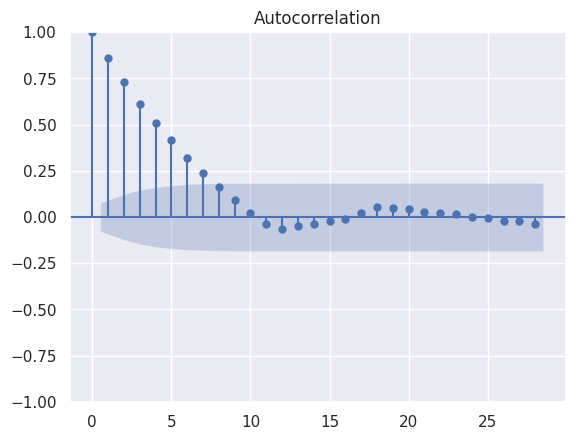

                          PanelOLS Estimation Summary                           
Dep. Variable:                     PE   R-squared:                        0.6369
Estimator:                   PanelOLS   R-squared (Between):             -3.8800
No. Observations:                 624   R-squared (Within):               0.6369
Date:                Sun, Jun 25 2023   R-squared (Overall):             -0.4371
Time:                        19:02:34   Log-likelihood                   -2201.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      88.866
Entities:                           4   P-value                           0.0000
Avg Obs:                       156.00   Distribution:                  F(12,608)
Min Obs:                       156.00                                           
Max Obs:                       156.00   F-statistic (robust):             88.866
                            


Variables have been fully absorbed and have removed from the regression:

company.ibm, company.nvidia, company.qualcomm



In [ ]:
# BERT
exog_vars = ['BERT_sent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS' , 'company']
exog = sm.add_constant(tc_cut[exog_vars])
YY = tc_cut.PE
panel_reg(YY, exog)

                        RandomEffects Estimation Summary                        
Dep. Variable:                     PE   R-squared:                        0.7264
Estimator:              RandomEffects   R-squared (Between):              1.0000
No. Observations:                 624   R-squared (Within):               0.6410
Date:                Sun, Jun 25 2023   R-squared (Overall):              0.7264
Time:                        19:02:39   Log-likelihood                   -2198.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      107.61
Entities:                           4   P-value                           0.0000
Avg Obs:                       156.00   Distribution:                  F(15,608)
Min Obs:                       156.00                                           
Max Obs:                       156.00   F-statistic (robust):             107.61
                            

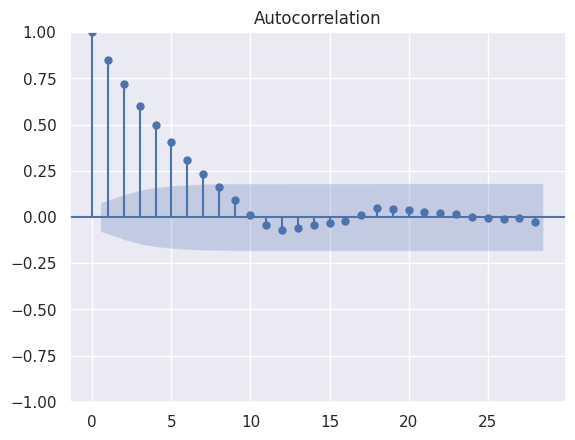

                          PanelOLS Estimation Summary                           
Dep. Variable:                     PE   R-squared:                        0.6410
Estimator:                   PanelOLS   R-squared (Between):             -4.3175
No. Observations:                 624   R-squared (Within):               0.6410
Date:                Sun, Jun 25 2023   R-squared (Overall):             -0.5380
Time:                        19:02:39   Log-likelihood                   -2198.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      90.477
Entities:                           4   P-value                           0.0000
Avg Obs:                       156.00   Distribution:                  F(12,608)
Min Obs:                       156.00                                           
Max Obs:                       156.00   F-statistic (robust):             90.477
                            


Variables have been fully absorbed and have removed from the regression:

company.ibm, company.nvidia, company.qualcomm



In [ ]:
# FinBERT
exog_vars = ['finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS' , 'company']
exog = sm.add_constant(tc_cut[exog_vars])
YY = tc_cut.PE
panel_reg(YY, exog)

### Telecom data without CCIy (annual Consumer Sentiment Index). From 2009-01-01 to 2021-12-31

                        RandomEffects Estimation Summary                        
Dep. Variable:                     PE   R-squared:                        0.6955
Estimator:              RandomEffects   R-squared (Between):              1.0000
No. Observations:                 624   R-squared (Within):               0.6005
Date:                Sun, Jun 25 2023   R-squared (Overall):              0.6955
Time:                        19:02:53   Log-likelihood                   -2231.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      99.339
Entities:                           4   P-value                           0.0000
Avg Obs:                       156.00   Distribution:                  F(14,609)
Min Obs:                       156.00                                           
Max Obs:                       156.00   F-statistic (robust):             99.339
                            

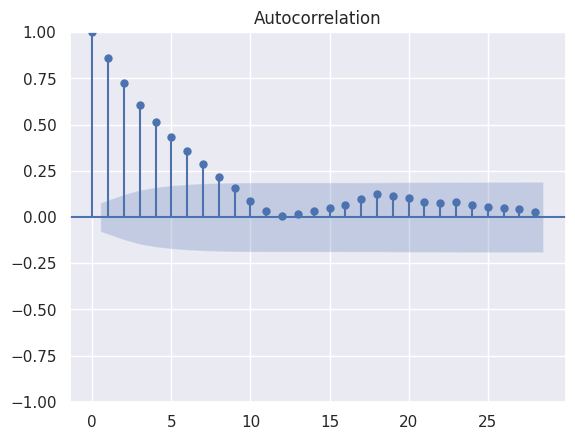

                          PanelOLS Estimation Summary                           
Dep. Variable:                     PE   R-squared:                        0.6005
Estimator:                   PanelOLS   R-squared (Between):             -3.2829
No. Observations:                 624   R-squared (Within):               0.6005
Date:                Sun, Jun 25 2023   R-squared (Overall):             -0.3229
Time:                        19:02:54   Log-likelihood                   -2231.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      83.205
Entities:                           4   P-value                           0.0000
Avg Obs:                       156.00   Distribution:                  F(11,609)
Min Obs:                       156.00                                           
Max Obs:                       156.00   F-statistic (robust):             83.205
                            


Variables have been fully absorbed and have removed from the regression:

company.ibm, company.nvidia, company.qualcomm



In [ ]:
# BERT
exog_vars = ['BERT_sent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'IR3m', 'IS' , 'company']
exog = sm.add_constant(tc_cut[exog_vars])
YY = tc_cut.PE
panel_reg(YY, exog)

                        RandomEffects Estimation Summary                        
Dep. Variable:                     PE   R-squared:                        0.7019
Estimator:              RandomEffects   R-squared (Between):              1.0000
No. Observations:                 624   R-squared (Within):               0.6089
Date:                Sun, Jun 25 2023   R-squared (Overall):              0.7019
Time:                        19:02:58   Log-likelihood                   -2224.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      102.43
Entities:                           4   P-value                           0.0000
Avg Obs:                       156.00   Distribution:                  F(14,609)
Min Obs:                       156.00                                           
Max Obs:                       156.00   F-statistic (robust):             102.43
                            

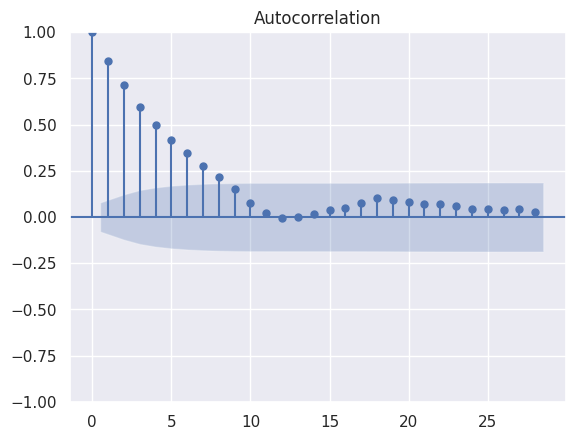


Variables have been fully absorbed and have removed from the regression:

company.ibm, company.nvidia, company.qualcomm



                          PanelOLS Estimation Summary                           
Dep. Variable:                     PE   R-squared:                        0.6089
Estimator:                   PanelOLS   R-squared (Between):             -4.0824
No. Observations:                 624   R-squared (Within):               0.6089
Date:                Sun, Jun 25 2023   R-squared (Overall):             -0.5066
Time:                        19:02:59   Log-likelihood                   -2224.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      86.199
Entities:                           4   P-value                           0.0000
Avg Obs:                       156.00   Distribution:                  F(11,609)
Min Obs:                       156.00                                           
Max Obs:                       156.00   F-statistic (robust):             86.199
                            

In [ ]:
# FinBERT
exog_vars = ['finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'IR3m', 'IS' , 'company']
exog = sm.add_constant(tc_cut[exog_vars])
YY = tc_cut.PE
panel_reg(YY, exog)

### Software data without CCIy. From 2016-01-01 to 2020-12-31

                        RandomEffects Estimation Summary                        
Dep. Variable:                     PE   R-squared:                        0.1729
Estimator:              RandomEffects   R-squared (Between):              1.0000
No. Observations:                 240   R-squared (Within):               0.1394
Date:                Sun, Jun 25 2023   R-squared (Overall):              0.1729
Time:                        19:03:02   Log-likelihood                   -2234.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.3601
Entities:                           4   P-value                           0.0001
Avg Obs:                       60.000   Distribution:                  F(14,225)
Min Obs:                       60.000                                           
Max Obs:                       60.000   F-statistic (robust):             3.3601
                            

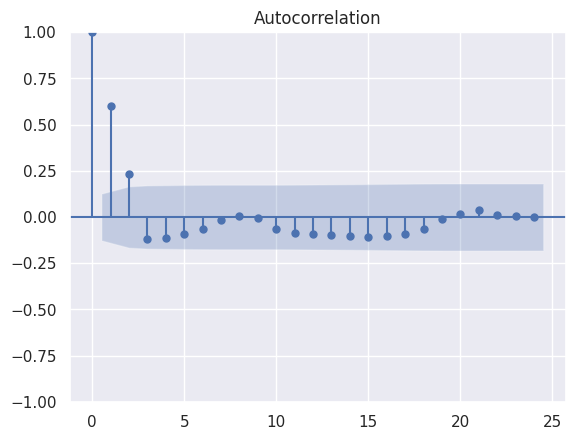

                          PanelOLS Estimation Summary                           
Dep. Variable:                     PE   R-squared:                        0.1394
Estimator:                   PanelOLS   R-squared (Between):             -24.513
No. Observations:                 240   R-squared (Within):               0.1394
Date:                Sun, Jun 25 2023   R-squared (Overall):             -0.8211
Time:                        19:03:03   Log-likelihood                   -2234.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.3129
Entities:                           4   P-value                           0.0003
Avg Obs:                       60.000   Distribution:                  F(11,225)
Min Obs:                       60.000                                           
Max Obs:                       60.000   F-statistic (robust):             3.3129
                            


Variables have been fully absorbed and have removed from the regression:

company.microsoft, company.salesforce, company.servicenow



In [ ]:
# BERT
exog_vars = ['BERT_sent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'IR3m', 'IS' , 'company']
exog = sm.add_constant(sw_cut[exog_vars])
YY = sw_cut.PE
panel_reg(YY, exog)

                        RandomEffects Estimation Summary                        
Dep. Variable:                     PE   R-squared:                        0.1969
Estimator:              RandomEffects   R-squared (Between):              1.0000
No. Observations:                 240   R-squared (Within):               0.1644
Date:                Sun, Jun 25 2023   R-squared (Overall):              0.1969
Time:                        19:03:06   Log-likelihood                   -2230.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.9412
Entities:                           4   P-value                           0.0000
Avg Obs:                       60.000   Distribution:                  F(14,225)
Min Obs:                       60.000                                           
Max Obs:                       60.000   F-statistic (robust):             3.9412
                            

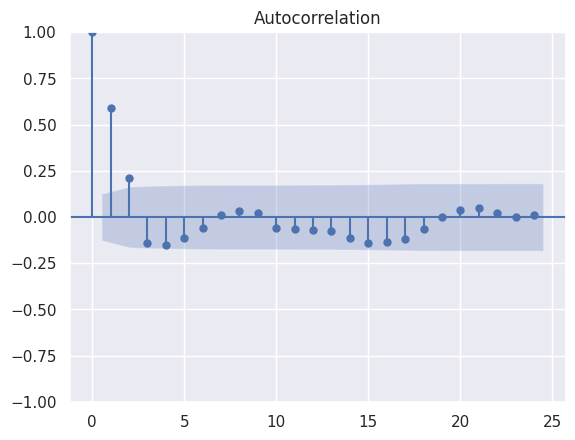

                          PanelOLS Estimation Summary                           
Dep. Variable:                     PE   R-squared:                        0.1644
Estimator:                   PanelOLS   R-squared (Between):             -29.165
No. Observations:                 240   R-squared (Within):               0.1644
Date:                Sun, Jun 25 2023   R-squared (Overall):             -0.9783
Time:                        19:03:07   Log-likelihood                   -2230.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.0237
Entities:                           4   P-value                           0.0000
Avg Obs:                       60.000   Distribution:                  F(11,225)
Min Obs:                       60.000                                           
Max Obs:                       60.000   F-statistic (robust):             4.0237
                            


Variables have been fully absorbed and have removed from the regression:

company.microsoft, company.salesforce, company.servicenow



In [ ]:
# FinBERT
exog_vars = ['finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'IR3m', 'IS' , 'company']
exog = sm.add_constant(sw_cut[exog_vars])
YY = sw_cut.PE
panel_reg(YY, exog)

### Software data without CCIy. From 2009-01-01 to 2021-12-31

                        RandomEffects Estimation Summary                        
Dep. Variable:                     PE   R-squared:                        0.0849
Estimator:              RandomEffects   R-squared (Between):              1.0000
No. Observations:                 624   R-squared (Within):               0.0715
Date:                Sun, Jun 25 2023   R-squared (Overall):              0.0849
Time:                        19:03:10   Log-likelihood                   -5596.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.0371
Entities:                           4   P-value                           0.0000
Avg Obs:                       156.00   Distribution:                  F(14,609)
Min Obs:                       156.00                                           
Max Obs:                       156.00   F-statistic (robust):             4.0371
                            

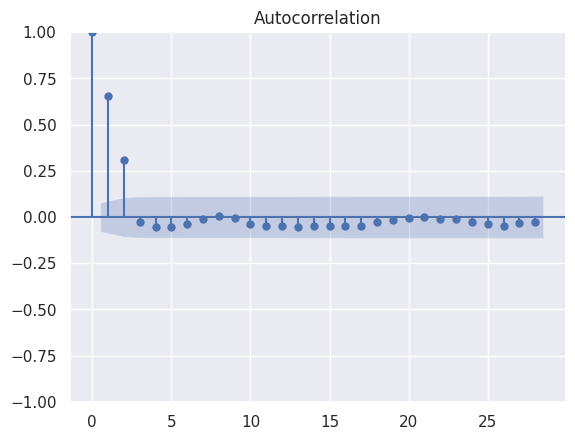

                          PanelOLS Estimation Summary                           
Dep. Variable:                     PE   R-squared:                        0.0715
Estimator:                   PanelOLS   R-squared (Between):             -7.8415
No. Observations:                 624   R-squared (Within):               0.0715
Date:                Sun, Jun 25 2023   R-squared (Overall):             -0.0427
Time:                        19:03:10   Log-likelihood                   -5596.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.2648
Entities:                           4   P-value                           0.0000
Avg Obs:                       156.00   Distribution:                  F(11,609)
Min Obs:                       156.00                                           
Max Obs:                       156.00   F-statistic (robust):             4.2648
                            


Variables have been fully absorbed and have removed from the regression:

company.microsoft, company.salesforce, company.servicenow



In [ ]:
# BERT
sw_cut = df_sw[(df_sw['date']<'2022-01-01') & (df_sw['date']>'2008-12-31')][['BERT_sent', 'finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM',  'IR3m', 'IS', 'company', 'PE']]
exog_vars = ['BERT_sent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'IR3m', 'IS' , 'company']
exog = sm.add_constant(sw_cut[exog_vars])
YY = sw_cut.PE
panel_reg(YY, exog)

                        RandomEffects Estimation Summary                        
Dep. Variable:                     PE   R-squared:                        0.0856
Estimator:              RandomEffects   R-squared (Between):              1.0000
No. Observations:                 624   R-squared (Within):               0.0722
Date:                Sun, Jun 25 2023   R-squared (Overall):              0.0856
Time:                        19:03:14   Log-likelihood                   -5596.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.0714
Entities:                           4   P-value                           0.0000
Avg Obs:                       156.00   Distribution:                  F(14,609)
Min Obs:                       156.00                                           
Max Obs:                       156.00   F-statistic (robust):             4.0714
                            

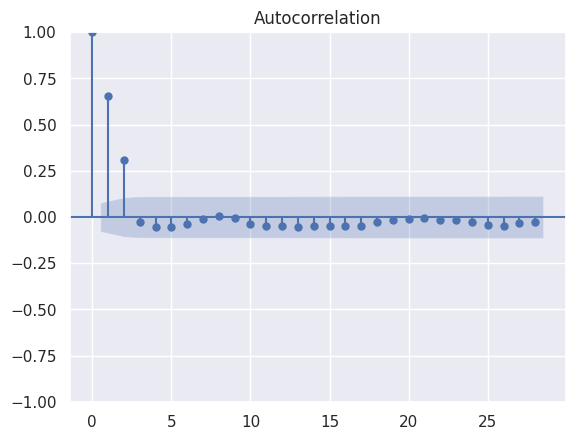

                          PanelOLS Estimation Summary                           
Dep. Variable:                     PE   R-squared:                        0.0722
Estimator:                   PanelOLS   R-squared (Between):             -9.0314
No. Observations:                 624   R-squared (Within):               0.0722
Date:                Sun, Jun 25 2023   R-squared (Overall):             -0.0592
Time:                        19:03:14   Log-likelihood                   -5596.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.3078
Entities:                           4   P-value                           0.0000
Avg Obs:                       156.00   Distribution:                  F(11,609)
Min Obs:                       156.00                                           
Max Obs:                       156.00   F-statistic (robust):             4.3078
                            


Variables have been fully absorbed and have removed from the regression:

company.microsoft, company.salesforce, company.servicenow



In [ ]:
# FinBERT
exog_vars = ['finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'IR3m', 'IS' , 'company']
exog = sm.add_constant(sw_cut[exog_vars])
YY = sw_cut.PE
panel_reg(YY, exog)

# LSTM

In [ ]:
# source: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


def reshape_data(reframed_train,reframed_test):
    #Frame as supervised learning and drop all time t columns except
    # split into train and test sets
    train= reframed_train.values
    test=reframed_test.values
    # split into input and outputs
    train_X, y_train = train[:, :-1], train[:, -1]
    test_X, y_test = test[:, :-1], test[:, -1]
    x_train = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    x_test = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    return x_train,x_test,y_train,y_test

# =====================================================================

def pred(list, companies, train_data1, test_data1, df):
  train_mean = train_data1.mean()
  train_std = train_data1.std()
  # normalization train and test data
  train_df = (train_data1 - train_mean) / train_std
  test_df = (test_data1 - train_mean) / train_std

  # add name company as a parametr
  train_df['company'] = df['company_code']
  train_df = train_df[list]
  test_df['company'] = df['company_code']
  test_df = test_df[list]

  # add the past month data as complementary columns
  reframed_train = pd.DataFrame()
  reframed_test = pd.DataFrame()
  for comp in companies:
    reframed_train = pd.concat([reframed_train, series_to_supervised(train_df.loc[comp], 1, 1)])
    reframed_test = pd.concat([reframed_test, series_to_supervised(test_df.loc[comp], 1, 1)])

  x_train,x_test,y_train,y_test = reshape_data(reframed_train,reframed_test)
  return x_train,x_test,y_train,y_test

# build model and make prediction
def make_model_y_test(x_train, y_train, x_test):
  model = Sequential()
  model.add(LSTM(60, activation='relu',input_shape=(x_train.shape[1], x_train.shape[2])))
  model.add(Dense(1))
  model.compile(loss='mae', optimizer='adam')
  history = model.fit(x_train, y_train, epochs=30, batch_size=50,  verbose=1, shuffle=False)
  y_test_pre=model.predict(x_test)
  return model, y_test_pre, history


def history_graph(history):
  plt.plot(history.history['loss'], label='Loss')
  plt.legend()
  plt.show()


# plot a graph with Predicted and Acutal Values
def prediction_plot(df, y_test, y_test_pre, plot_param, y1, y2):
  valid_data = df[(df['date']>'2021-01-01')][plot_param]
  pa=pd.DataFrame()
  pa['date']=valid_data.reset_index().date.iloc[:-1]
  pa['Prediction']=[i[0] for i in y_test_pre][1:]
  pa['Actual Values']=y_test[:-1]
  # pa.head()
  plt.figure(figsize=(10,5))
  pa.groupby('date')['Prediction'].sum().plot(kind='line',label='prediction',color='red')
  pa.groupby('date')['Actual Values'].sum().plot(kind='line',label='actual values',color='blue')
  plt.xticks(rotation=45,size=7)
  plt.yticks(size=10)

  plt.ylabel('P/E',fontsize=10)
  plt.xlabel('time',fontsize=10)
  plt.title('Predicted Values VS Acutal Values',fontsize=10)
  plt.legend()

  plt.text(5, y1, f'RMSE = {round(np.sqrt(mean_squared_error(y_test,y_test_pre)), 3)}', fontsize = 10, color='green')
  plt.text(5, y2, f'R^2 = {round(r2_score(y_test, y_test_pre), 3)}', fontsize = 10, color='green')
  plt.show()

### LSTM model for telecom data with FinBERT

In [ ]:
path = f'panel_data/telecom.csv'
df_tc = pd.read_csv(path, encoding="latin1", header = 0, delimiter=",")
encoder = LabelEncoder()
df_tc['company_code']= encoder.fit_transform(df_tc['company'])
df_tc.set_index(['company', 'time'], inplace=True)

company_list = ['apple', 'ibm', 'nvidia', 'qualcomm']

# cut data with time and parametrs
train_data = df_tc[(df_tc['date']<'2021-01-01') & (df_tc['date']>'2007-12-31')][['BERT_sent', 'finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'PE']]
test_data = df_tc[df_tc['date']>'2020-12-31'][['BERT_sent', 'finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'PE']]

In [ ]:
parametrs = ['finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'company', 'PE']
# get train and test data
x_train,x_test,y_train,y_test = pred(list=parametrs, companies=company_list, train_data1=train_data, test_data1=test_data, df=df_tc)

In [ ]:
model, y_test_pre, history=make_model_y_test(x_train, y_train, x_test)

Train on 620 samples
Epoch 1/30
620/620 [==============================] - 1s 2ms/sample - loss: 0.6749
Epoch 2/30
620/620 [==============================] - 0s 77us/sample - loss: 0.6178
Epoch 3/30
620/620 [==============================] - 0s 72us/sample - loss: 0.5743
Epoch 4/30
620/620 [==============================] - 0s 68us/sample - loss: 0.5324
Epoch 5/30
620/620 [==============================] - 0s 80us/sample - loss: 0.4899
Epoch 6/30
620/620 [==============================] - 0s 68us/sample - loss: 0.4437
Epoch 7/30
620/620 [==============================] - 0s 67us/sample - loss: 0.3967
Epoch 8/30
620/620 [==============================] - 0s 71us/sample - loss: 0.3590
Epoch 9/30
620/620 [==============================] - 0s 94us/sample - loss: 0.3280
Epoch 10/30
620/620 [==============================] - 0s 78us/sample - loss: 0.3035
Epoch 11/30
620/620 [==============================] - 0s 61us/sample - loss: 0.2873
Epoch 12/30
620/620 [==============================] -

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


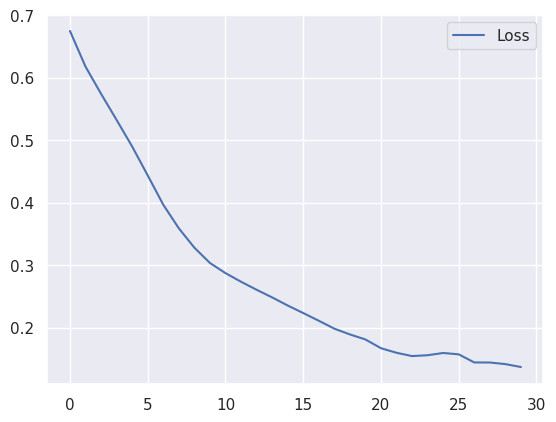

In [ ]:
history_graph(history)

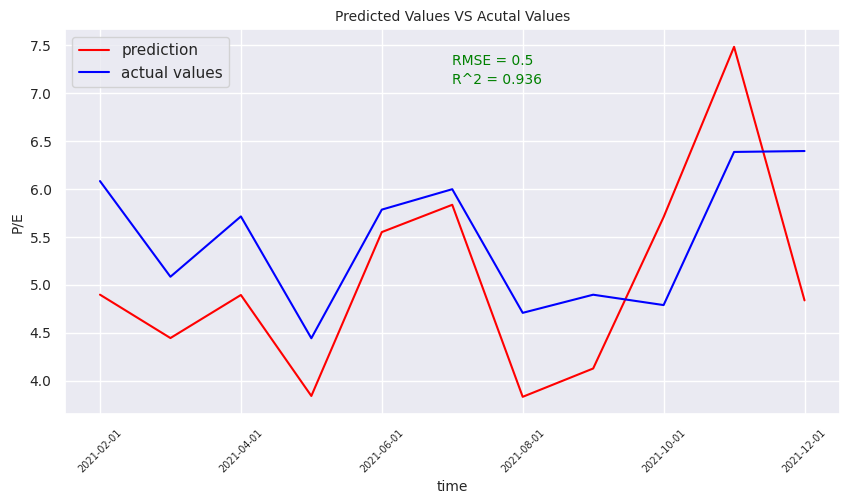

In [ ]:
plot_param = ['finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'PE', 'date']
prediction_plot(df_tc, y_test, y_test_pre, plot_param, y1=7.3, y2=7.1)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


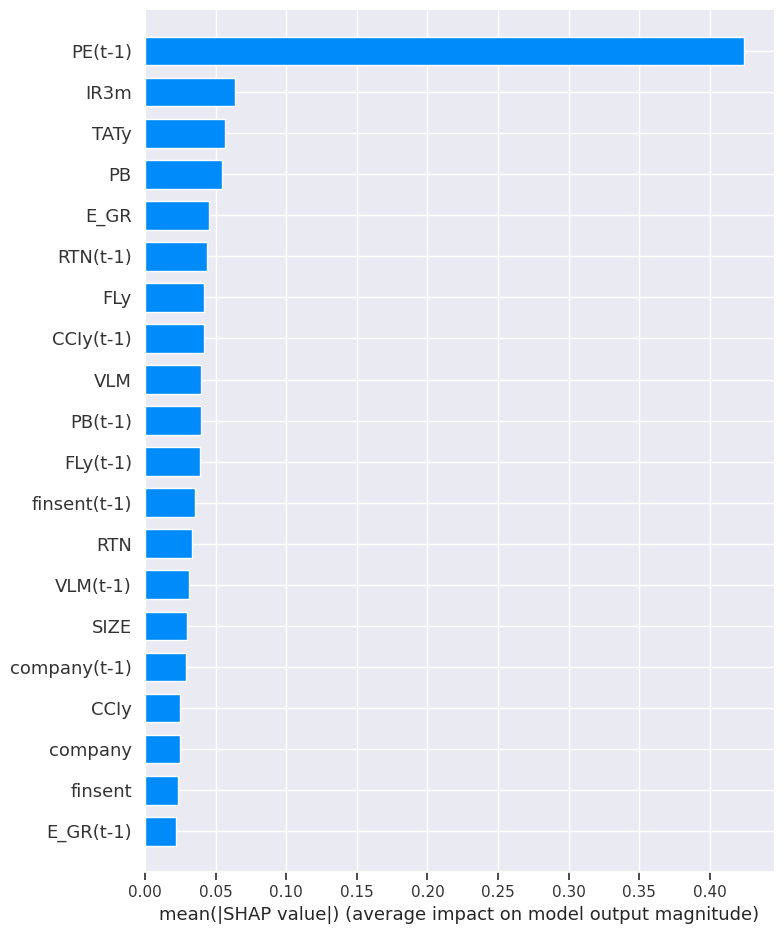

In [ ]:
cols = ['finsent(t-1)', 'FLy(t-1)', 'E_GR(t-1)', 'PB(t-1)', 'RTN(t-1)', 'SIZE(t-1)', 'TATy(t-1)', 'VLT(t-1)', 'VLM(t-1)', 'CCIy(t-1)', 'IR3m(t-1)',
       'IS(t-1)', 'company(t-1)', 'PE(t-1)', 'finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'company']
# feature importance
explainer = shap.DeepExplainer(model, x_train)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values[0][:, 0, :], x_train[:10][:, 0, :], feature_names=cols, plot_type="bar")

### LSTM model for telecom data with BERT

In [ ]:
parametrs = ['BERT_sent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'company', 'PE']
x_train,x_test,y_train,y_test = pred(list=parametrs, companies=company_list, train_data1=train_data, test_data1=test_data, df=df_tc)

In [ ]:
model, y_test_pre, history=make_model_y_test(x_train, y_train, x_test)

Train on 620 samples
Epoch 1/30
620/620 [==============================] - 2s 4ms/sample - loss: 0.6847
Epoch 2/30
620/620 [==============================] - 0s 79us/sample - loss: 0.6180
Epoch 3/30
620/620 [==============================] - 0s 78us/sample - loss: 0.5677
Epoch 4/30
620/620 [==============================] - 0s 81us/sample - loss: 0.5187
Epoch 5/30
620/620 [==============================] - 0s 82us/sample - loss: 0.4692
Epoch 6/30
620/620 [==============================] - 0s 78us/sample - loss: 0.4248
Epoch 7/30
620/620 [==============================] - 0s 78us/sample - loss: 0.3814
Epoch 8/30
620/620 [==============================] - 0s 86us/sample - loss: 0.3376
Epoch 9/30
620/620 [==============================] - 0s 78us/sample - loss: 0.3031
Epoch 10/30
620/620 [==============================] - 0s 90us/sample - loss: 0.2766
Epoch 11/30
620/620 [==============================] - 0s 77us/sample - loss: 0.2585
Epoch 12/30
620/620 [==============================] -

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


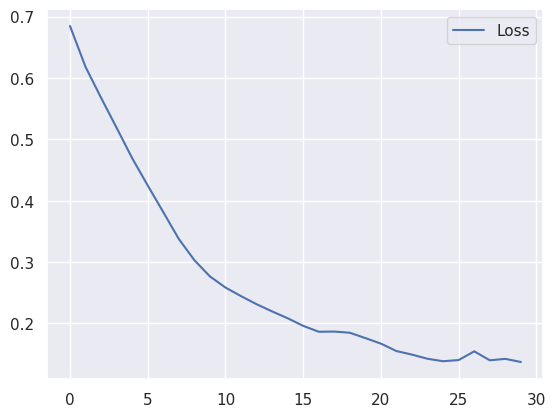

In [ ]:
history_graph(history)

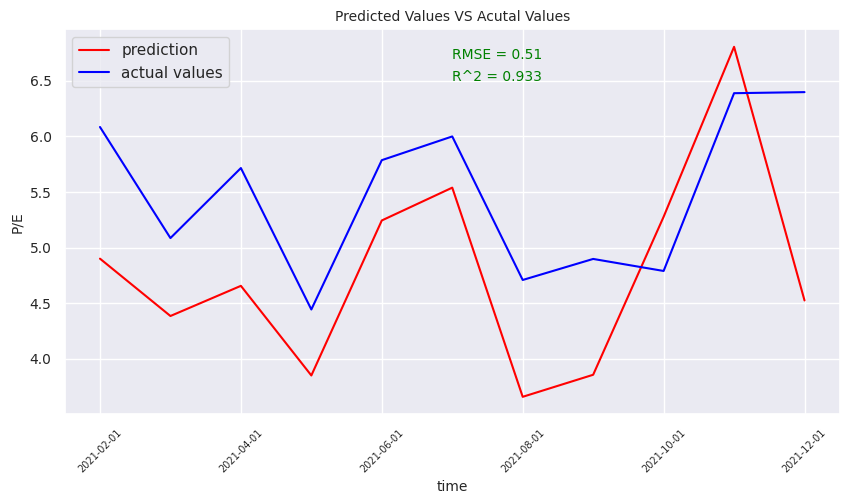

In [ ]:
plot_param = ['BERT_sent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'PE', 'date']
prediction_plot(df_tc, y_test, y_test_pre, plot_param, y1=6.7, y2=6.5)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


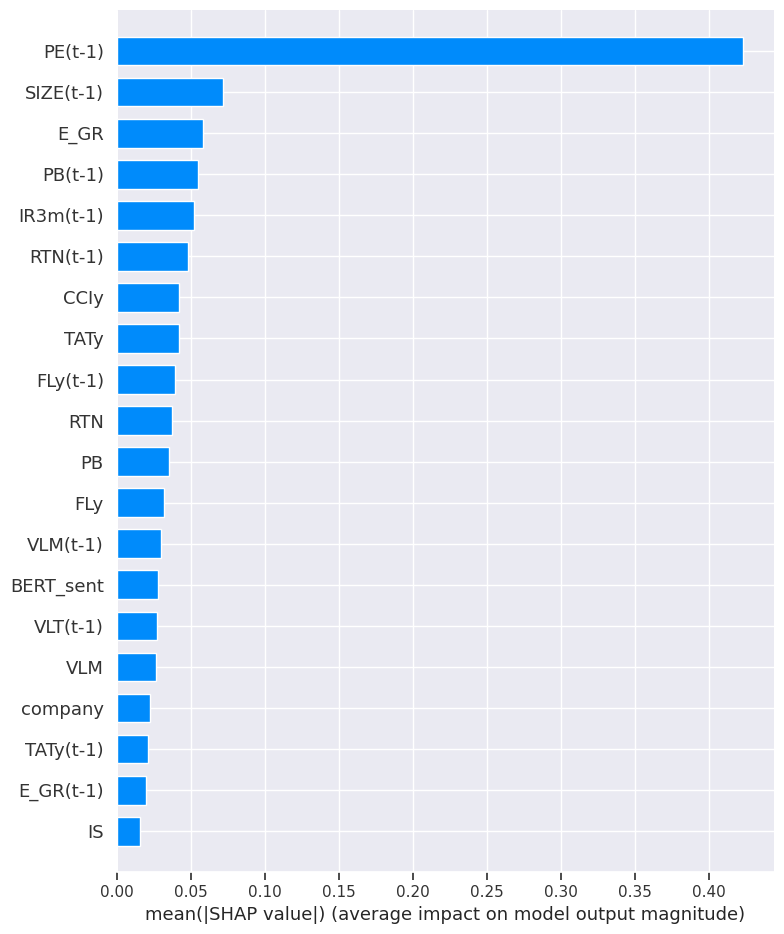

In [ ]:
cols = ['BERT_sent(t-1)', 'FLy(t-1)', 'E_GR(t-1)', 'PB(t-1)', 'RTN(t-1)', 'SIZE(t-1)', 'TATy(t-1)', 'VLT(t-1)', 'VLM(t-1)', 'CCIy(t-1)', 'IR3m(t-1)',
       'IS(t-1)', 'company(t-1)', 'PE(t-1)', 'BERT_sent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'company']

explainer = shap.DeepExplainer(model, x_train)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values[0][:, 0, :], x_train[:10][:, 0, :], feature_names=cols, plot_type="bar")

### LSTM model for software data with FinBERT

In [ ]:
path = f'panel_data/software.csv'
df_sw = pd.read_csv(path, encoding="latin1", header = 0, delimiter=",")
encoder = LabelEncoder()
df_sw['company_code']= encoder.fit_transform(df_sw['company'])
df_sw.set_index(['company', 'time'], inplace=True)

company_list = ['adobe', 'microsoft', 'salesforce', 'servicenow']

train_data = df_sw[(df_sw['date']<'2021-01-01') & (df_sw['date']>'2015-01-01')][['BERT_sent', 'finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'PE']]
test_data = df_sw[df_sw['date']>'2020-12-31'][['BERT_sent', 'finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'PE']]

df_sw

finsent  BERT_sent        date     FLq     FLy   E_GR  \
company    time                                                           
adobe      0     0.487634   0.186022  2007-01-01  0.0000  0.0000  45.78   
           1     0.467463   0.217674  2007-02-01  0.0000  0.0000  45.78   
           2     0.686324   0.320806  2007-03-01  0.0000  0.0000  45.78   
           3     0.662460   0.303499  2007-04-01  0.0000  0.0000  45.78   
           4     0.674533   0.357868  2007-05-01  0.0000  0.0000  45.78   
...                   ...        ...         ...     ...     ...    ...   
servicenow 175   0.920453   0.622088  2021-08-01  0.4462  0.4265  91.53   
           176   0.913128   0.645282  2021-09-01  0.4462  0.4265  91.53   
           177   0.884822   0.642072  2021-10-01  0.4265  0.4265  91.53   
           178   0.902343   0.636162  2021-11-01  0.4265  0.4265  91.53   
           179   0.893859   0.682777  2021-12-01  0.4265  0.4265  91.53   

                        PB       RTN  RVN_GR       SIZE  ...       CCIy  \
company    time                                          ...              
adobe      0      4.508710 -0.442903   22.62  23.868627  ...  83.480645   
           1      4.498071  0.190714   22.62  23.865908  ...  63.700000   
           2      4.654290  0.489355   22.62  23.891921  ...  63.700000   
           3      4.877300 -0.069667   22.62  23.938709  ...  63.700000   
           4      4.859935  0.270645   22.62  23.935682  ...  63.700000   
...                    ...       ...     ...        ...  ...        ...   
servicenow 175   36.354516  0.464839   30.47  25.502896  ...  77.600000   
           176   39.238000 -0.641000   30.47  25.581568  ...  77.600000   
           177   36.924194  0.115806   30.47  25.594567  ...  77.600000   
           178   38.023333 -0.271333   30.47  25.623880  ...  77.600000   
           179   35.812903  0.258710   30.47  25.566846  ...  77.600000   

                     IR1m      IR3m      IR6m      IR1y         IS   USIPI  \
company    time                                                              
adobe      0     4.938387  5.106774  5.151935  5.058710  16.198387   99.86   
           1     5.179643  5.168214  5.161429  5.057143  15.975000  100.81   
           2     5.203871  5.078065  5.099355  4.922903   0.864194  101.03   
           3     4.981333  5.000667  5.068333  4.932667   0.320000  101.75   
           4     4.822581  4.871935  4.983548  4.914839  -4.945806  101.81   
...                   ...       ...       ...       ...        ...     ...   
servicenow 175   0.041290  0.054516  0.055484  0.074516   4.621290  100.13   
           176   0.053667  0.043667  0.053333  0.077333  -5.631333   99.06   
           177   0.055806  0.052903  0.060968  0.114194   7.167742  100.30   
           178   0.068333  0.052667  0.074333  0.181667   6.853667  101.20   
           179   0.036774  0.058065  0.148710  0.296774  -3.509677  100.89   

                       VIX          PE  company_code  
company    time                                       
adobe      0     11.148065   47.555806             0  
           1     11.046071   47.300357             0  
           2     15.188710   44.924839             0  
           3     13.036333   47.078000             0  
           4     13.353548   46.852258             0  
...                    ...         ...           ...  
servicenow 175   17.297419  715.494194             3  
           176   19.947333  768.280333             3  
           177   17.972258  601.589032             3  
           178   18.960333  619.489000             3  
           179   21.401613  583.340000             3  

[720 rows x 26 columns]

In [ ]:
parametrs = ['finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'company', 'PE']

x_train,x_test,y_train,y_test = pred(list=parametrs, companies=company_list, train_data1=train_data, test_data1=test_data, df=df_sw)

In [ ]:
model, y_test_pre, history=make_model_y_test(x_train, y_train, x_test)

Train on 280 samples
Epoch 1/30
280/280 [==============================] - 2s 7ms/sample - loss: 0.1971
Epoch 2/30
280/280 [==============================] - 0s 119us/sample - loss: 0.1710
Epoch 3/30
280/280 [==============================] - 0s 102us/sample - loss: 0.1619
Epoch 4/30
280/280 [==============================] - 0s 108us/sample - loss: 0.1544
Epoch 5/30
280/280 [==============================] - 0s 97us/sample - loss: 0.1473
Epoch 6/30
280/280 [==============================] - 0s 98us/sample - loss: 0.1431
Epoch 7/30
280/280 [==============================] - 0s 85us/sample - loss: 0.1385
Epoch 8/30
280/280 [==============================] - 0s 103us/sample - loss: 0.1349
Epoch 9/30
280/280 [==============================] - 0s 97us/sample - loss: 0.1317
Epoch 10/30
280/280 [==============================] - 0s 112us/sample - loss: 0.1310
Epoch 11/30
280/280 [==============================] - 0s 121us/sample - loss: 0.1272
Epoch 12/30
280/280 [===========================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


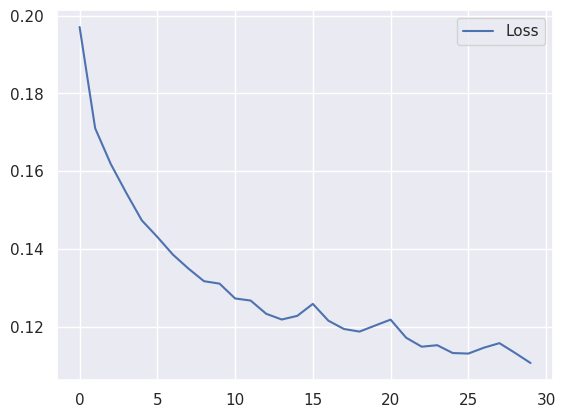

In [ ]:
history_graph(history)

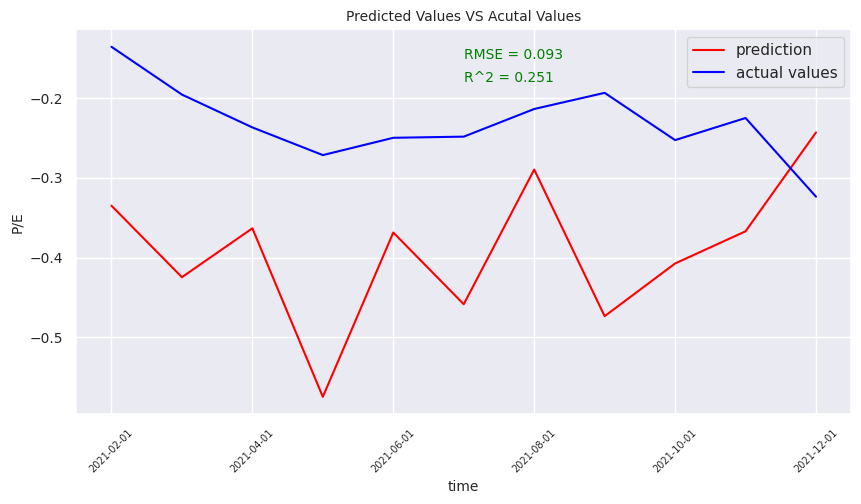

In [ ]:
plot_param = ['finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'PE', 'date']
prediction_plot(df_tc, y_test, y_test_pre, plot_param, y1=-0.15, y2=-0.18)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


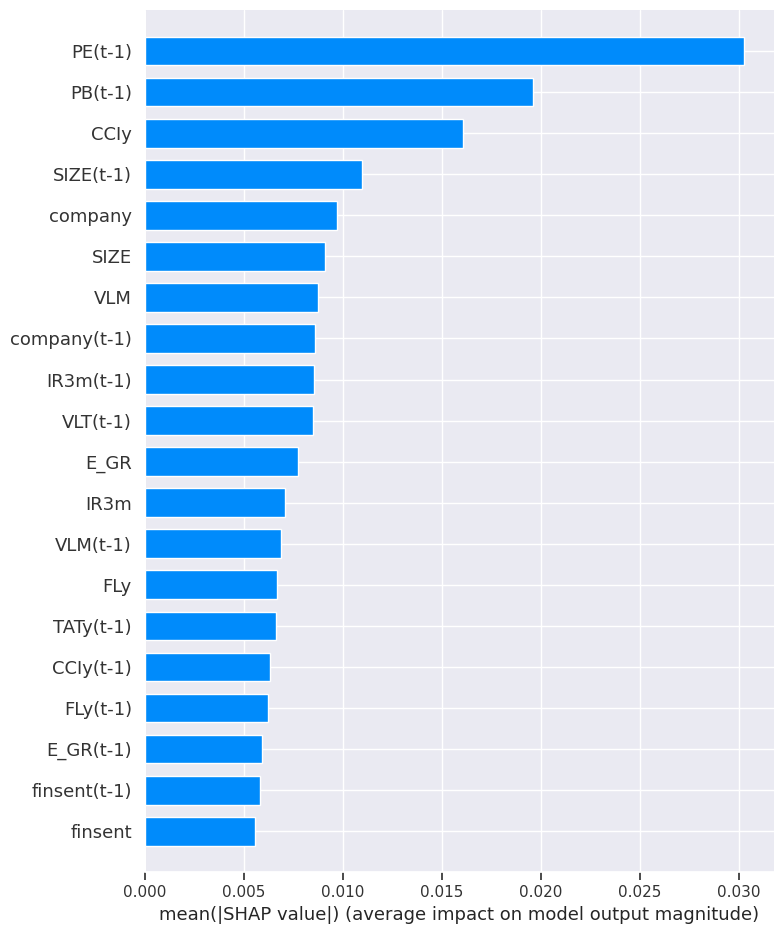

In [ ]:
cols = ['finsent(t-1)', 'FLy(t-1)', 'E_GR(t-1)', 'PB(t-1)', 'RTN(t-1)', 'SIZE(t-1)', 'TATy(t-1)', 'VLT(t-1)', 'VLM(t-1)', 'CCIy(t-1)', 'IR3m(t-1)',
        'IS(t-1)', 'company(t-1)', 'PE(t-1)', 'finsent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'company']

explainer = shap.DeepExplainer(model, x_train)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values[0][:, 0, :], x_train[:10][:, 0, :], feature_names=cols, plot_type="bar")

### LSTM model for software data with BERT

In [ ]:
parametrs = ['BERT_sent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'company', 'PE']
cols = ['BERT_sent(t-1)', 'FLy(t-1)', 'E_GR(t-1)', 'PB(t-1)', 'RTN(t-1)', 'SIZE(t-1)', 'TATy(t-1)', 'VLT(t-1)', 'VLM(t-1)', 'CCIy(t-1)', 'IR3m(t-1)',
       'IS(t-1)', 'company(t-1)', 'PE(t-1)', 'BERT_sent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'company']
x_train,x_test,y_train,y_test = pred(list=parametrs, companies=company_list, train_data1=train_data, test_data1=test_data, df=df_sw)

In [ ]:
model, y_test_pre, history=make_model_y_test(x_train, y_train, x_test)

Train on 280 samples
Epoch 1/30
280/280 [==============================] - 2s 8ms/sample - loss: 0.3079
Epoch 2/30
280/280 [==============================] - 0s 164us/sample - loss: 0.2321
Epoch 3/30
280/280 [==============================] - 0s 146us/sample - loss: 0.1838
Epoch 4/30
280/280 [==============================] - 0s 140us/sample - loss: 0.1624
Epoch 5/30
280/280 [==============================] - 0s 131us/sample - loss: 0.1570
Epoch 6/30
280/280 [==============================] - 0s 125us/sample - loss: 0.1460
Epoch 7/30
280/280 [==============================] - 0s 141us/sample - loss: 0.1395
Epoch 8/30
280/280 [==============================] - 0s 143us/sample - loss: 0.1349
Epoch 9/30
280/280 [==============================] - 0s 159us/sample - loss: 0.1293
Epoch 10/30
280/280 [==============================] - 0s 147us/sample - loss: 0.1274
Epoch 11/30
280/280 [==============================] - 0s 148us/sample - loss: 0.1240
Epoch 12/30
280/280 [=======================

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


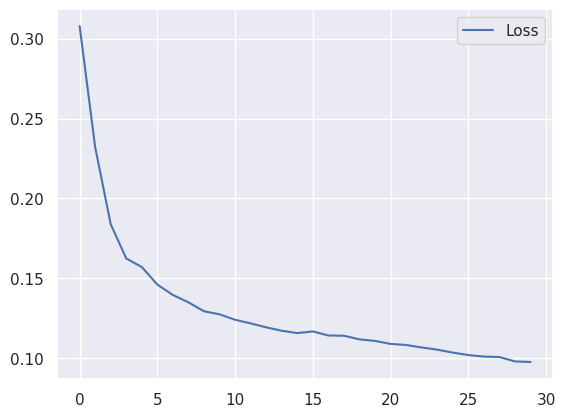

In [ ]:
history_graph(history)

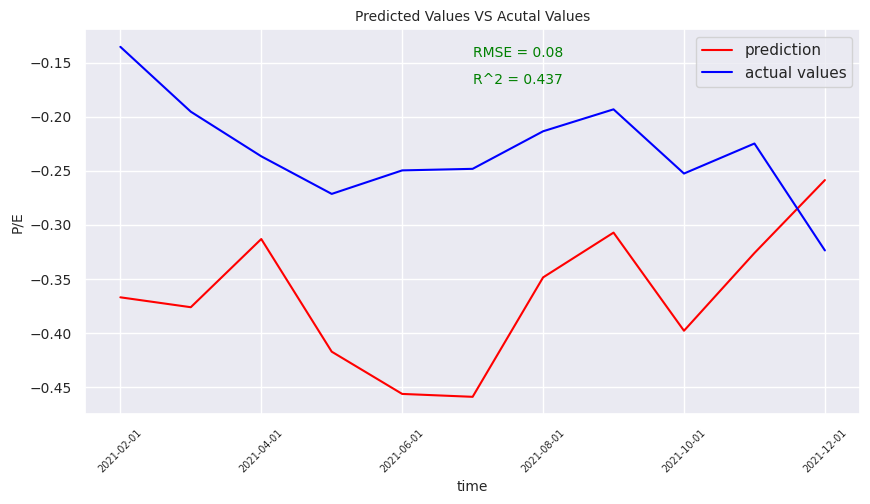

In [ ]:
plot_param = ['BERT_sent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'PE', 'date']
prediction_plot(df_tc, y_test, y_test_pre, plot_param, y1=-0.145, y2=-0.17)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


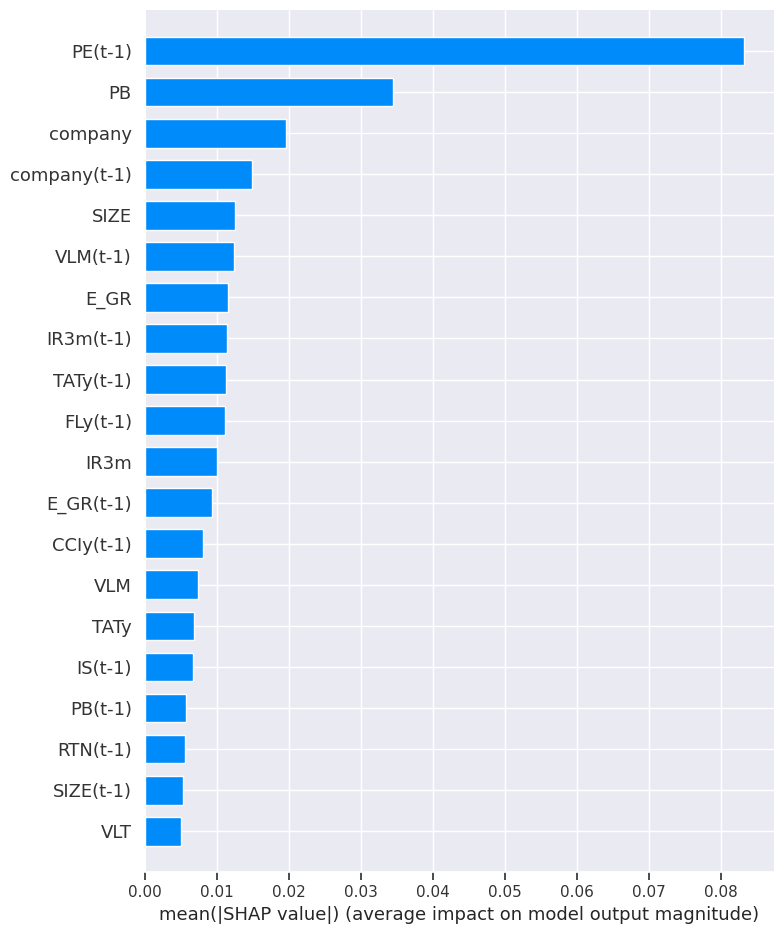

In [ ]:
cols = ['BERT_sent(t-1)', 'FLy(t-1)', 'E_GR(t-1)', 'PB(t-1)', 'RTN(t-1)', 'SIZE(t-1)', 'TATy(t-1)', 'VLT(t-1)', 'VLM(t-1)', 'CCIy(t-1)', 'IR3m(t-1)',
       'IS(t-1)', 'company(t-1)', 'PE(t-1)', 'BERT_sent', 'FLy', 'E_GR', 'PB', 'RTN', 'SIZE', 'TATy', 'VLT', 'VLM', 'CCIy', 'IR3m', 'IS', 'company']
explainer = shap.DeepExplainer(model, x_train)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values[0][:, 0, :], x_train[:10][:, 0, :], feature_names=cols, plot_type="bar")